In [1]:
from sgposit.pcposit import PCPosit
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
nbits = 32 # number of bits of the posits
es = 2 # number of exponent bits of the posits

In [2]:
def f(x):
    ans = x
    for i in range(1,n):
        ans *= x
    if isinstance(ans, PCPosit):
        return ans - posit_root
    return ans - float_root

In [3]:
def mul_int(x, n):
    ans = x
    for i in range(1,n):
        ans += x
    return ans

In [4]:
def df(x):
    temp = x
    for i in range(1, n-1):
        temp *= x
    return mul_int(temp, n)

In [5]:
def NewRap(x):
    return x - f(x) / df(x)

In [6]:
#Put a posit into a 64 bits float
def posit_to_float(p):
    (x,m) = p._fixedpoint()
    return x* 2**m
#Put a list of posits into 64 bits floats
def posit_lst_to_float(lst):
    for i in range(0, len(lst)):
        lst[i] = posit_to_float(lst[i])
    return lst

In [7]:
def computeNewRap():
    # Value of solution by iteration
    nrp = [posit_x0]*(steps+1)
    nrf = [float_x0]*(steps+1)
    # Error by iteration
    errorp = [posit_x0 - posit_root]*(steps+1)
    errorf = [float_x0 - float_root]*(steps+1)

    for i in range(steps):
        nrp[i+1] = NewRap(nrp[i])
        nrf[i+1] = NewRap(nrf[i])
        errorp[i+1] = nrp[i+1]-posit_root
        errorf[i+1] = nrf[i+1]-float_root

    if (steps <= 10):
        print(posit_lst_to_float(nrp))
        print(posit_lst_to_float(errorp))
        print(nrf)
        print(errorf)
    else:
        posit_lst_to_float(errorp)

    # Plotting results
    plt.figure(figsize=(10,3))
    plt.subplot(1, 2, 1)
    plt.plot(range(steps+1), errorf)
    plt.title("Error at Newton-Raphson for floats")
    plt.xlabel("Number of steps")
    plt.ylabel("Error")

    plt.subplot(1, 2, 2)
    plt.plot(range(steps+1), errorp)
    plt.title("Error at Newton-Raphson for posits")
    plt.xlabel("Number of steps")
    plt.ylabel("Error")

    plt.show()

$f(x) = x^3-1 \text{ with } x_0 = \frac{1}{4}$

[0.25, 5.5, 3.67768594622612, 2.476435661315918, 1.7053102478384972, 1.25149654597044, 1.0471544563770294, 1.0020915418863297, 1.0000043585896492, 1.0, 1.0]
[-0.75, 4.5, 2.67768594622612, 1.476435661315918, 0.7053102478384972, 0.2514965459704399, 0.04715445637702942, 0.002091541886329651, 4.3585896492004395e-06, 0, 0]
[0.25, 5.5, 3.677686, 2.4764357, 1.7053102, 1.2514966, 1.0471544, 1.0020915, 1.0000044, 1.0, 1.0]
[-0.75, 4.5, 2.677686, 1.4764357, 0.7053102, 0.25149655, 0.047154427, 0.002091527, 4.4107437e-06, 0.0, 0.0]


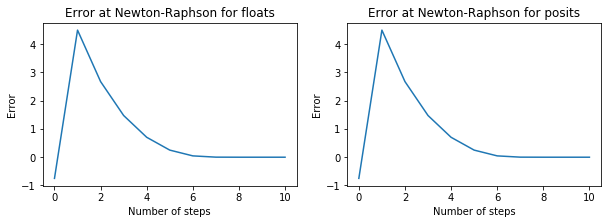

In [8]:
steps = 10 # amount of steps that are calculated

# initialize value x0 for posits and floats
# here is chosen x0 = 1/4
posit_x0 = PCPosit(3*2**(nbits-4), mode='bits', nbits=nbits, es=es)
float_x0 = np.float32(1.0/4)

# numbers where the nth root is calculated
# In this case n = 3 and the number from which the root is drawn is 1
n = 3
posit_root = PCPosit(2**(nbits-2), mode='bits', nbits=nbits, es=es)
float_root = np.float32(1)

# exact answer in a 64 bit float
exact = float(1)

computeNewRap()

$f(x) = x^3 \text{ with } x_0 = \frac{1}{4}$

[0.25, 0.16666666604578495, 0.11111111100763083, 0.07407407369464636, 0.04938271548599005, 0.03292181063443422, 0.021947873756289482, 0.014631915604695678, 0.009754610364325345, 0.006503073556814343, 0.004335382313001901]
[0.25, 0.16666666604578495, 0.11111111100763083, 0.07407407369464636, 0.04938271548599005, 0.03292181063443422, 0.021947873756289482, 0.014631915604695678, 0.009754610364325345, 0.006503073556814343, 0.004335382313001901]
[0.25, 0.16666666, 0.111111104, 0.07407407, 0.04938271, 0.032921806, 0.021947872, 0.014631914, 0.009754609, 0.0065030726, 0.0043353816]
[0.25, 0.16666666, 0.111111104, 0.07407407, 0.04938271, 0.032921806, 0.021947872, 0.014631914, 0.009754609, 0.0065030726, 0.0043353816]


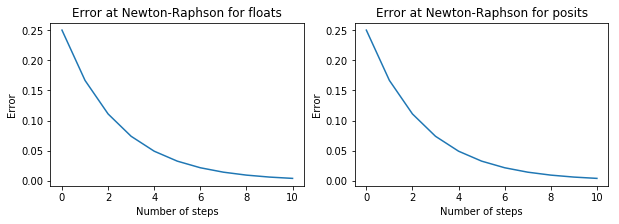

In [9]:
steps = 10 # amount of steps that are calculated

# initialize value x0 for posits and floats
# here is chosen x0 = 1/4
posit_x0 = PCPosit(3*2**(nbits-4), mode='bits', nbits=nbits, es=es)
float_x0 = np.float32(1.0/4)

# numbers where the nth root is calculated
# In this case n = 3 and the number from which the root is drawn is 0
n = 3
posit_root = PCPosit(0, mode='bits', nbits=nbits, es=es)
float_root = np.float32(0)

# exact answer in a 64 bit float
exact = float(0)

computeNewRap()

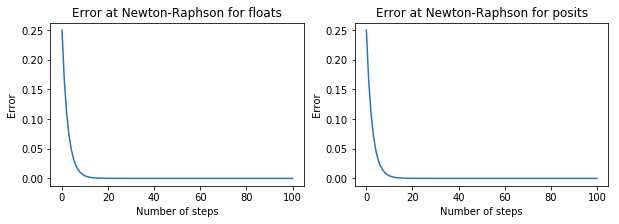

In [10]:
steps=100
computeNewRap()

$f(x) = x^{120} - 2^{-120} \text{ with } x_0 = 4$

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in float_scalars
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in float_scalars
  


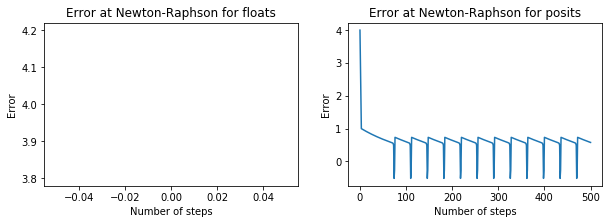

In [11]:
steps = 500 # amount of steps that are calculated

# initialize value x0 for posits and floats
# here is chosen x0 = 4
posit_x0 = PCPosit(5*2**(nbits-4), mode='bits', nbits=nbits, es=es)
float_x0 = np.float32(4)

# numbers where the nth root is calculated
# In this case n = 120 and the number from which the root is drawn is 2^(-120)
n = 120
posit_root = PCPosit(1, mode='bits', nbits=nbits, es=es)
float_root = np.float32(2**(-120))

# exact answer in a 64 bit float
exact = float(0.5)

computeNewRap()

## Bailey's Numerical Nightmare
(From *The End of Error*)   

Solve the system
$$\begin{pmatrix}
0.25510582 & 0.52746197\\
0.80143857 & 1.65707065
\end{pmatrix}
\begin{pmatrix}
x\\
y
\end{pmatrix}
= 
\begin{pmatrix}
0.79981812\\
2.51270273
\end{pmatrix}$$

In [12]:
a, b, c, d = 25510582/(2**26), 52746197/(2**26), 80143857/(2**26), 165707065/(2**26)
u, v = 79981812/(2**26), 251270273/(2**26)

#### Algebraic solution with `sympy` package

In [13]:
x, y = symbols('x y')
M = Matrix(((a,b,u), (c,d,v)))
system = A, b = M[:, :-1], M[:, -1]
linsolve(system, (x, y))

{(-1.0, 2.0)}

In [14]:
a, b, c, d = 25510582/(2**26), 52746197/(2**26), 80143857/(2**26), 165707065/(2**26)
u, v = 79981812/(2**26), 251270273/(2**26)

Using Cramer’s rule:

In [15]:
fa, fb, fc, fd = np.float64(a), np.float64(b), np.float64(c), np.float64(d)
fu, fv = np.float64(u), np.float64(v)

det = fa*fd - fb*fc;
fx, fy = (fu*fd - fb*fv)/det, (fa*fv - fu*fc)/det
{fx,fy}

{0.0, 2.0}

In [16]:
nbits = 59 # number of bits of the posits
es = 3 # number of exponent bits of the posits

pa = PCPosit(85984435977336745528465019211884789760, mode='bits', nbits=nbits, es=es)
pb = PCPosit(140259739010334720, mode='bits', nbits=nbits, es=es)
pc = PCPosit(145864715220811776, mode='bits', nbits=nbits, es=es)
pd = PCPosit(155235600964780032, mode='bits', nbits=nbits, es=es)
pu = PCPosit(162517018002587648, mode='bits', nbits=nbits, es=es)
pv = PCPosit(160977650653855744, mode='bits', nbits=nbits, es=es)

det = pa*pd - pb*pc;
px, py = (pu*pd - pb*pv)/det, (pa*pv - pu*pc)/det
posit_to_float(px), posit_to_float(py)

AssertionError: 